<a href="https://colab.research.google.com/github/yohanesnuwara/CoreImageDrivenML/blob/main/notebooks/1_Thin_Section_Pore_Image_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow


In [2]:
!git clone https://github.com/yohanesnuwara/CoreImageDrivenML


Cloning into 'CoreImageDrivenML'...
remote: Enumerating objects: 34, done.
remote: Counting objects: 100% (34/34), done.
remote: Compressing objects: 100% (32/32), done.
remote: Total 34 (delta 15), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (34/34), 3.56 MiB | 6.43 MiB/s, done.
Resolving deltas: 100% (15/15), done.


Resolution (micron/pixel):  0.3610108303249097
Unit pixel area (micron2/pixel):  0.13032881961188075


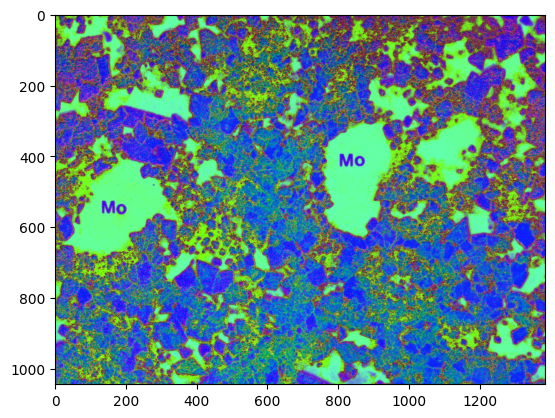

In [10]:
image = cv2.imread('/content/CoreImageDrivenML/data/2505.4_upper_edit.png')
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

real_mm = 0.5
resolution = (real_mm / image.shape[1]) * 1000
unit_area = resolution * resolution

print('Resolution (micron/pixel): ', resolution)
print('Unit pixel area (micron2/pixel): ', unit_area)

plt.imshow(hsv_image)
plt.show()

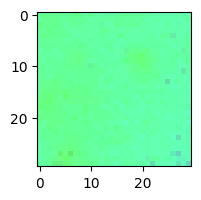

In [16]:
# Zoom at pore
pore = hsv_image[230:260,220:250,:]
plt.figure(figsize=(2,2))
plt.imshow(pore)

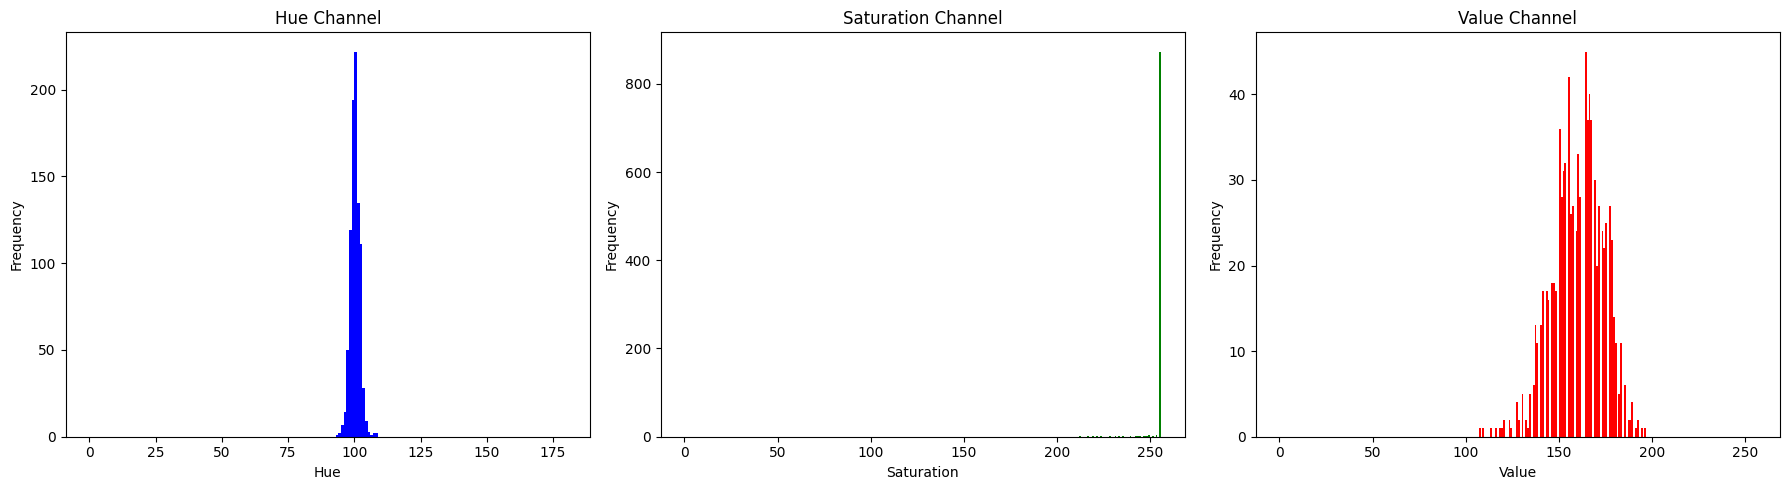

In [19]:
# Split the HSV image into its three channels: Hue, Saturation, and Value
hue_channel, sat_channel, val_channel = cv2.split(hsv_image[230:260,220:250,:])


# Plot histograms for each channel
plt.figure(figsize=(18, 5))

# Hue channel histogram
plt.subplot(1, 3, 1)
plt.hist(hue_channel.ravel(), bins=180, range=[0, 180], color='blue')
plt.title('Hue Channel')
plt.xlabel('Hue')
plt.ylabel('Frequency')

# Saturation channel histogram
plt.subplot(1, 3, 2)
plt.hist(sat_channel.ravel(), bins=256, range=[0, 256], color='green')
plt.title('Saturation Channel')
plt.xlabel('Saturation')
plt.ylabel('Frequency')

# Value channel histogram
plt.subplot(1, 3, 3)
plt.hist(val_channel.ravel(), bins=256, range=[0, 256], color='red')
plt.title('Value Channel')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

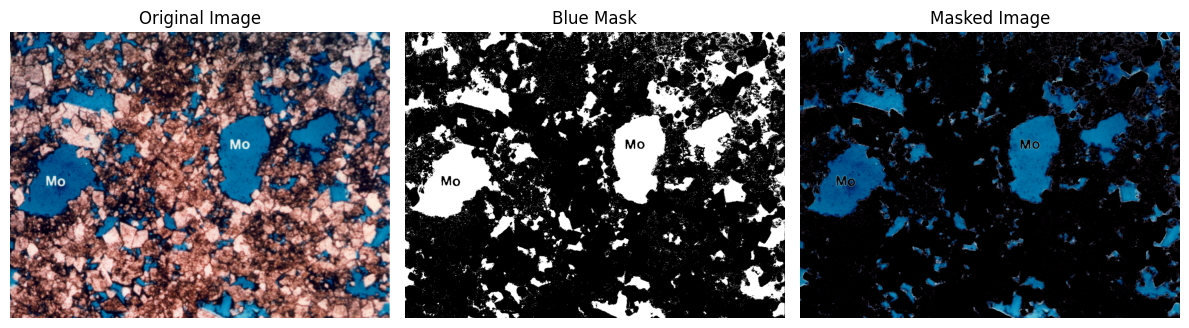

In [36]:
# Define the lower and upper bounds for the blue color in HSV
lower_blue = np.array([50, 50, 50])
upper_blue = np.array([160, 255, 255])

# Create a mask for the blue areas
blue_mask = cv2.inRange(hsv_image, lower_blue, upper_blue)

# Apply the mask to the original image to isolate the blue parts
masked_image = cv2.bitwise_and(image, image, mask=blue_mask)

# Plot the original image, the mask, and the masked image
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(blue_mask, cmap='gray')
plt.title('Blue Mask')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(masked_image, cv2.COLOR_BGR2RGB))
plt.title('Masked Image')
plt.axis('off')

plt.tight_layout()
plt.show()

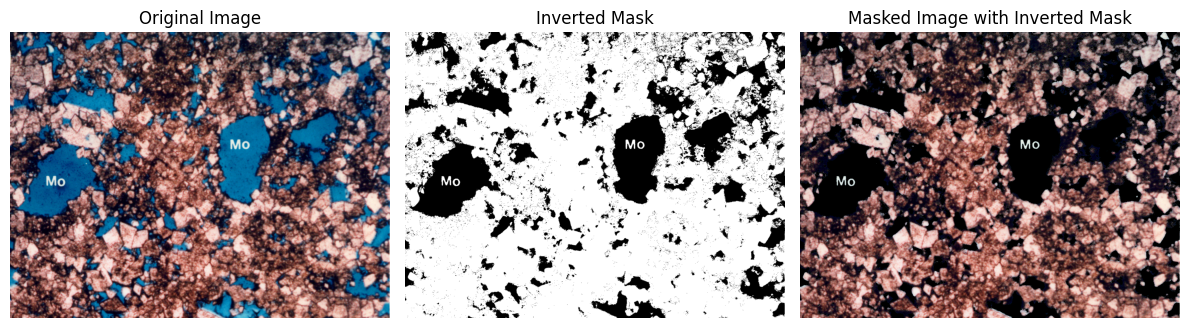

In [29]:
# Define the lower and upper bounds for the blue color in HSV
lower_blue = np.array([50, 50, 50])
upper_blue = np.array([160, 255, 255])

# Create a mask for the blue areas
blue_mask = cv2.inRange(hsv_image, lower_blue, upper_blue)

# Invert the mask to select non-blue areas
inverted_mask = cv2.bitwise_not(blue_mask)

# Apply the inverted mask to the original image to isolate non-blue parts
masked_image_inverted = cv2.bitwise_and(image, image, mask=inverted_mask)

# Plot the original image, the inverted mask, and the masked image with the inverted mask
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(inverted_mask, cmap='gray')
plt.title('Inverted Mask')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(masked_image_inverted, cv2.COLOR_BGR2RGB))
plt.title('Masked Image with Inverted Mask')
plt.axis('off')

plt.tight_layout()
plt.show()


The total perimeter of pore space (micron):  29446.990258211692
The total area of pore space (micron2):  42071.51142332103
The POA (1/mm):  699.9270827690937


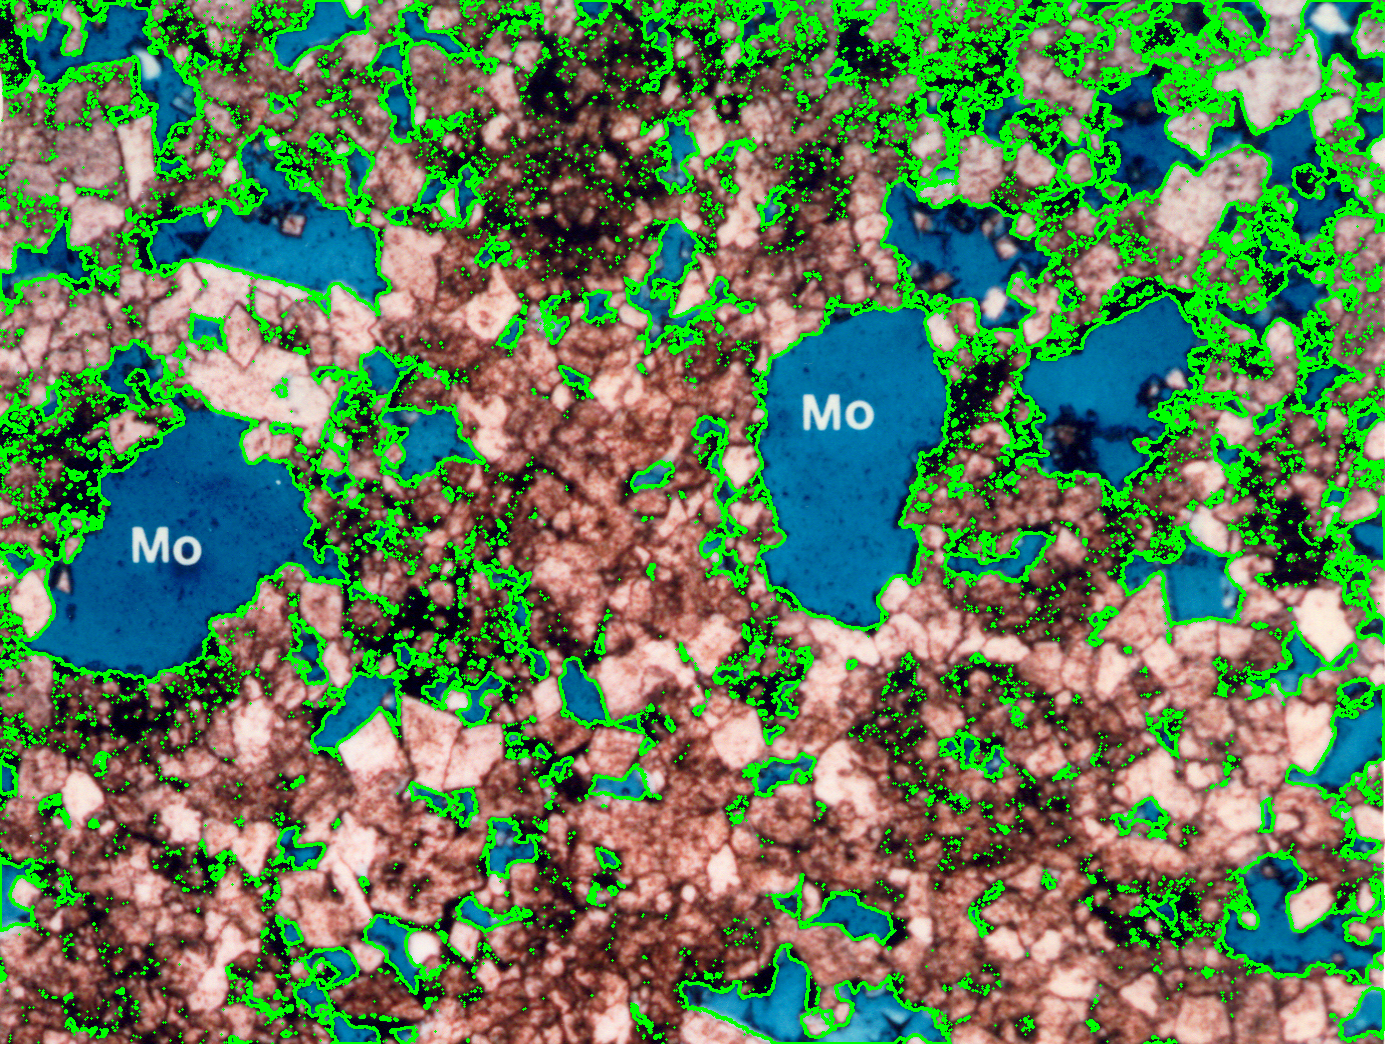

In [35]:
# Convert the masked image to grayscale
gray_image = cv2.cvtColor(masked_image, cv2.COLOR_BGR2GRAY)

# Apply binary thresholding to get a binary image
_, binary_image = cv2.threshold(gray_image, 1, 255, cv2.THRESH_BINARY)

# Find contours in the binary image
contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Optionally draw contours on the original image for visualization
contour_image = image.copy()
cv2.drawContours(contour_image, contours, -1, (0, 255, 0), 2)

# Calculate the perimeter of each contour
perimeters = []
for i, contour in enumerate(contours):
    perimeter = cv2.arcLength(contour, True)  # 'True' indicates that the contour is closed
    perimeters.append(perimeter)

perimeter = sum(perimeters)* resolution
# print('The total perimeter of pore space (pixel): ', perimeter)
print('The total perimeter of pore space (micron): ', perimeter)


# Calculate the area of each contour
areas = []
for i, contour in enumerate(contours):
    area = cv2.contourArea(contour)
    areas.append(area)

area = sum(areas) * unit_area
# print('The total area of pore space (pixel): ', sum(areas))
print('The total area of pore space (micron2): ', area)

# Calculate POA / SS
poa = (perimeter / area) * 1000
print('The POA (1/mm): ', poa)

# Display results
cv2_imshow(contour_image)

In [31]:
# Calculate porosity
total_pixels = hsv_image.shape[0] * hsv_image.shape[1]

# Calculate the number of masked pixels (non-zero values in the mask)
masked_pixels = np.count_nonzero(blue_mask)

# Calculate the number of unmasked pixels
unmasked_pixels = total_pixels - masked_pixels

# Calculate the ratio of masked to unmasked areas
masked_to_unmasked_ratio = masked_pixels / total_pixels

total_pixels, masked_pixels, unmasked_pixels, masked_to_unmasked_ratio


(1445940, 350948, 1094992, 0.24271269900549125)